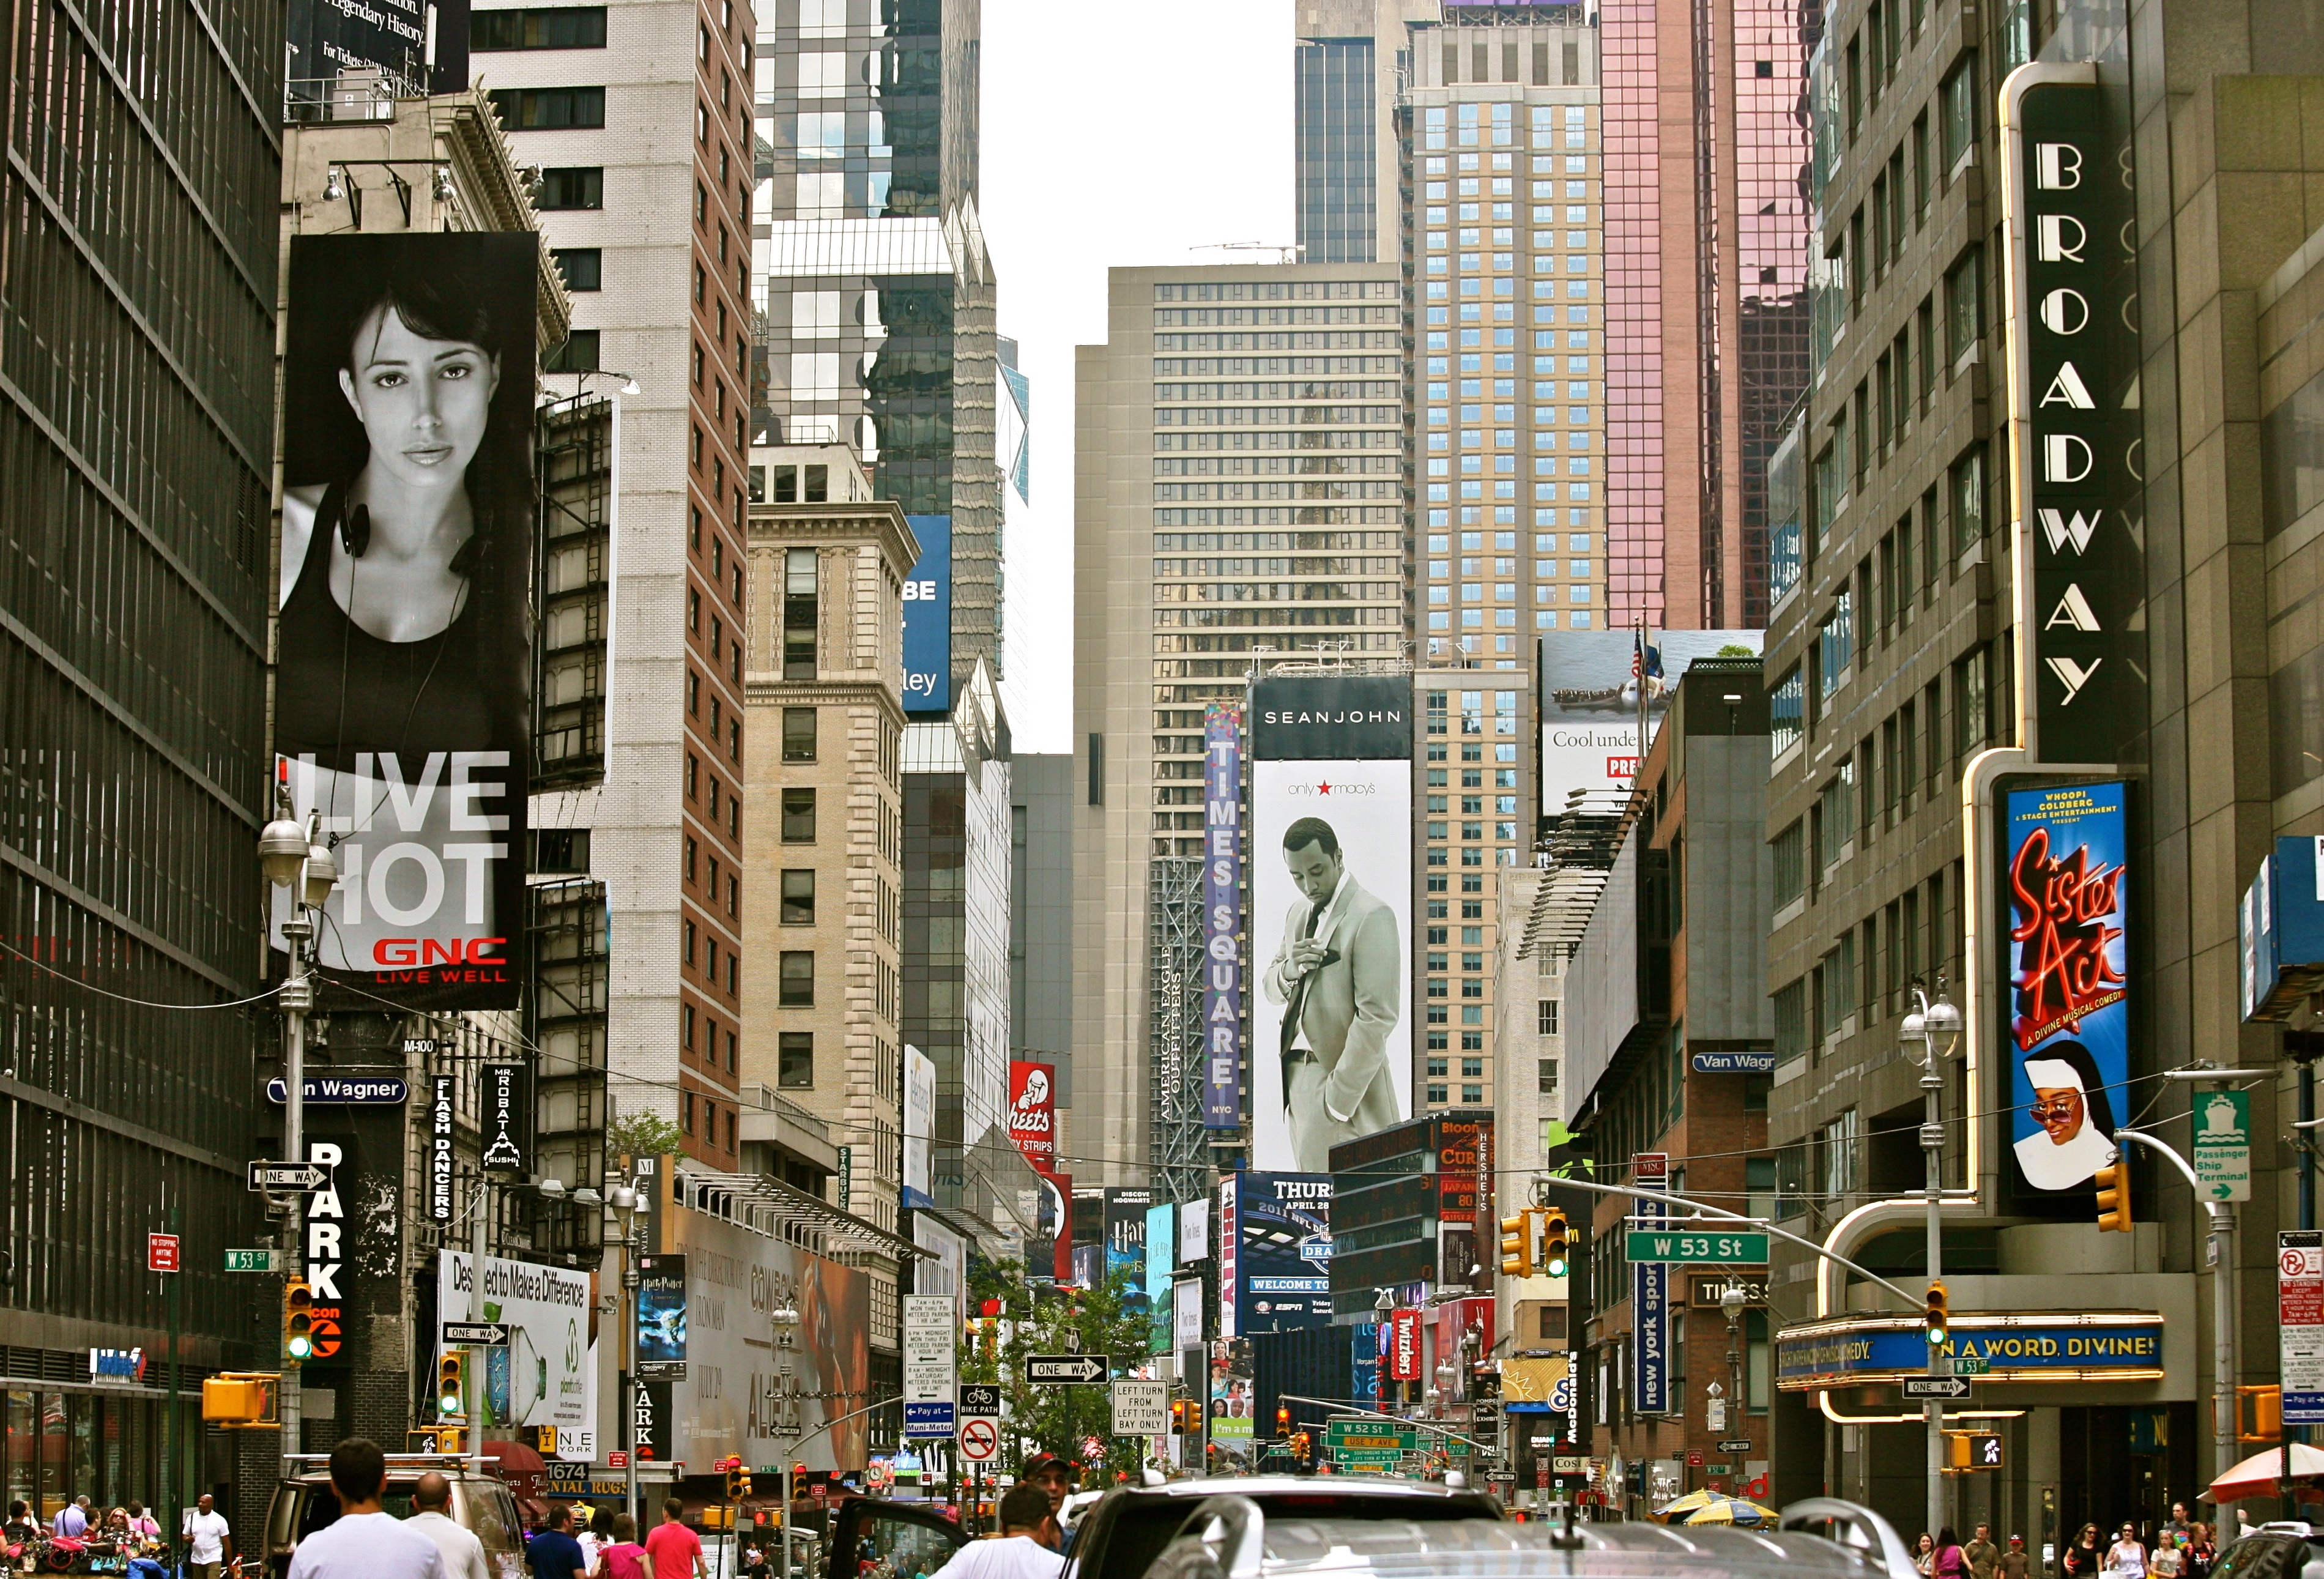

In [1]:
import pandas as pd

In [3]:
import pymongo
from pymongo import MongoClient

In [4]:
import numpy as np
import seaborn as sns
import sklearn

import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [67]:
client = MongoClient('localhost',27017)
db = client['project']
data = db.crime
df = pd.DataFrame(list(data.find()))
df

_id  CMPLNT_NUM CMPLNT_FR_DT CMPLNT_FR_TM  \
0        63285228297f5242ca929e45   715018699   06/20/2019     00:40:00   
1        63285228297f5242ca929e46   571641911   06/21/2019     19:15:00   
2        63285228297f5242ca929e47   445856544   06/20/2019     23:16:00   
3        63285228297f5242ca929e48   200139641   06/21/2019     02:25:00   
4        63285228297f5242ca929e49   763908116   06/18/2019     15:00:00   
...                           ...         ...          ...          ...   
1048572  63285234297f5242caa29041   342582936   01/18/2019     22:20:00   
1048573  63285234297f5242caa29042   896960148   01/26/2019     03:12:00   
1048574  63285234297f5242caa29043   375328229   01/15/2019     20:30:00   
1048575  63285234297f5242caa29044   941408817   01/26/2019     21:00:00   
1048576  63285234297f5242caa29045   255697673   01/17/2019     17:09:00   

         ADDR_PCT_CD      RPT_DT  KY_CD  \
0               75.0  06/20/2019    117   
1               28.0  06/21/2019    117   
2               94.0  06/21/2019    578   
3               63.0  06/21/2019    118   
4               48.0  06/18/2019    351   
...              ...         ...    ...   
1048572         63.0  01/19/2019    361   
1048573         47.0  01/26/2019    344   
1048574         67.0  01/18/2019    361   
1048575         52.0  01/26/2019    113   
1048576         76.0  01/17/2019    578   

                                            OFNS_DESC CRM_ATPT_CPTD_CD  \
0                                     DANGEROUS DRUGS        COMPLETED   
1                                     DANGEROUS DRUGS        COMPLETED   
2                                          HARASSMENT        COMPLETED   
3                                   DANGEROUS WEAPONS        COMPLETED   
4                                   CRIMINAL MISCHIEF        COMPLETED   
...                                               ...              ...   
1048572  OFFENSES AGAINST PUBLIC ORDER/ADMINISTRATION        COMPLETED   
1048573                    ASSAULT & RELATED OFFENSES        COMPLETED   
1048574  OFFENSES AGAINST PUBLIC ORDER/ADMINISTRATION        COMPLETED   
1048575                                       FORGERY        COMPLETED   
1048576                                    HARASSMENT        COMPLETED   

          LAW_CAT_CD  ... X_COORD_CD Y_COORD_CD SUSP_AGE_GROUP  \
0             FELONY  ...  1020291.0   182660.0          25-44   
1             FELONY  ...   999319.0   232965.0          45-64   
2          VIOLATION  ...   995530.0   200997.0        UNKNOWN   
3             FELONY  ...  1005370.0   171152.0          25-44   
4        MISDEMEANOR  ...  1016425.0   246601.0            <18   
...              ...  ...        ...        ...            ...   
1048572  MISDEMEANOR  ...  1011798.0   164966.0        UNKNOWN   
1048573  MISDEMEANOR  ...  1023077.0   264473.0          18-24   
1048574  MISDEMEANOR  ...  1003875.0   179582.0          45-64   
1048575       FELONY  ...  1010565.0   252137.0        UNKNOWN   
1048576    VIOLATION  ...   983721.0   186631.0        UNKNOWN   

                        SUSP_RACE  SUSP_SEX   Latitude  Longitude  \
0                  WHITE HISPANIC    FEMALE  40.667971 -73.870084   
1                           BLACK      MALE  40.806106 -73.945569   
2                  WHITE HISPANIC      MALE  40.718368 -73.959309   
3                           BLACK    FEMALE  40.636432 -73.923906   
4                           BLACK      MALE  40.843488 -73.883714   
...                           ...       ...        ...        ...   
1048572                   UNKNOWN         U  40.619435 -73.900771   
1048573  ASIAN / PACIFIC ISLANDER      MALE  40.892514 -73.859568   
1048574                     BLACK    FEMALE  40.659574 -73.929268   
1048575                   UNKNOWN   UNKNOWN  40.858702 -73.904871   
1048576                   UNKNOWN         U  40.678944 -74.001909   

        VIC_AGE_GROUP                  VIC_RACE                VIC_SEX  
0             UNKNOWN       

In [7]:
df1=df.sample(n=100000)

In [8]:
df1.columns

Index(['_id', 'CMPLNT_NUM', 'CMPLNT_FR_DT', 'CMPLNT_FR_TM', 'ADDR_PCT_CD',
       'RPT_DT', 'KY_CD', 'OFNS_DESC', 'CRM_ATPT_CPTD_CD', 'LAW_CAT_CD',
       'BORO_NM', 'LOC_OF_OCCUR_DESC', 'PREM_TYP_DESC', 'JURIS_DESC',
       'X_COORD_CD', 'Y_COORD_CD', 'SUSP_AGE_GROUP', 'SUSP_RACE', 'SUSP_SEX',
       'Latitude', 'Longitude', 'VIC_AGE_GROUP', 'VIC_RACE', 'VIC_SEX'],
      dtype='object')

In [9]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV

In [10]:
df2=df1[['OFNS_DESC','CRM_ATPT_CPTD_CD','BORO_NM','LOC_OF_OCCUR_DESC','PREM_TYP_DESC','JURIS_DESC','SUSP_AGE_GROUP','SUSP_RACE','SUSP_SEX','VIC_AGE_GROUP','VIC_RACE',
       'VIC_SEX']]

In [11]:
X=pd.get_dummies(df2,drop_first=True)
y=df1['LAW_CAT_CD']

In [12]:
encoder = LabelEncoder()
le_y = encoder.fit_transform(y)
print(encoder.classes_)

['FELONY' 'MISDEMEANOR' 'VIOLATION']


## NAIVE BAYES ALGORITHM

In [13]:
from sklearn.naive_bayes import BernoulliNB,MultinomialNB

In [14]:
nb = MultinomialNB()
kfold = StratifiedKFold(n_splits=3, random_state=2022, shuffle=True)
results = cross_val_score(nb, X, y, cv = kfold, scoring = 'accuracy')

In [15]:
print(results.mean())

0.9455500050890592


In [16]:
nb = BernoulliNB()
kfold = StratifiedKFold(n_splits=3, random_state=2022, shuffle=True)
results = cross_val_score(nb, X, y, cv = kfold, scoring = 'accuracy')

In [17]:
print(results.mean())

0.94903001258968


## DECISION TREE CLASSIFICATION ALGORITHM

In [18]:
from sklearn.tree import DecisionTreeClassifier

In [19]:
params={'max_depth':[None,7,3],'min_samples_split':[2,5,10],'min_samples_leaf':[1,5]}
dtree=DecisionTreeClassifier(random_state=2022)
kfold=StratifiedKFold(n_splits=3,random_state=2022,shuffle=True)
gcv=GridSearchCV(dtree,param_grid=params,scoring='accuracy',cv=kfold)

In [20]:
gcv.fit(X,y)
pd_gcv=pd.DataFrame(gcv.cv_results_)
print(gcv.best_params_)
print(gcv.best_score_)

{'max_depth': None, 'min_samples_leaf': 5, 'min_samples_split': 2}
0.9482699968896852


## RANDOM-FOREST CLASSIFICATION ALGORITHM

In [21]:
from sklearn.ensemble import RandomForestClassifier

In [22]:
params = {'max_features':[2,3,4]}
clf = RandomForestClassifier(random_state=2022)
kfold = StratifiedKFold(n_splits=3, shuffle=(True), random_state=2022)
gcv = GridSearchCV(clf, param_grid= params, cv = kfold, scoring='accuracy')

In [23]:
gcv.fit(X,y)
pd_cv = pd.DataFrame(gcv.cv_results_)
print(gcv.best_params_)
print(gcv.best_score_)

{'max_features': 4}
0.9502100153898881


## GRADIENT-BOOSTING CLASSIFICATION ALGORITHM

In [24]:
from sklearn.ensemble import GradientBoostingClassifier

In [25]:
clf= GradientBoostingClassifier(random_state=2022)
params = {'learning_rate':[0.001,0.01,0.2],
          'n_estimators':[50],
          'max_depth':[2,3]}

In [26]:
kfold = StratifiedKFold(n_splits=5, shuffle=(True), random_state=2022)
gcv = GridSearchCV(clf, param_grid= params, cv = kfold, scoring='accuracy')
gcv.fit(X,y)
pd_cv = pd.DataFrame(gcv.cv_results_)
print(gcv.best_params_)
print(gcv.best_score_)

{'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 50}
0.9535399999999999


## TOP 10 crimes of NYC

<AxesSubplot:title={'center':'Types of Crimes'}>

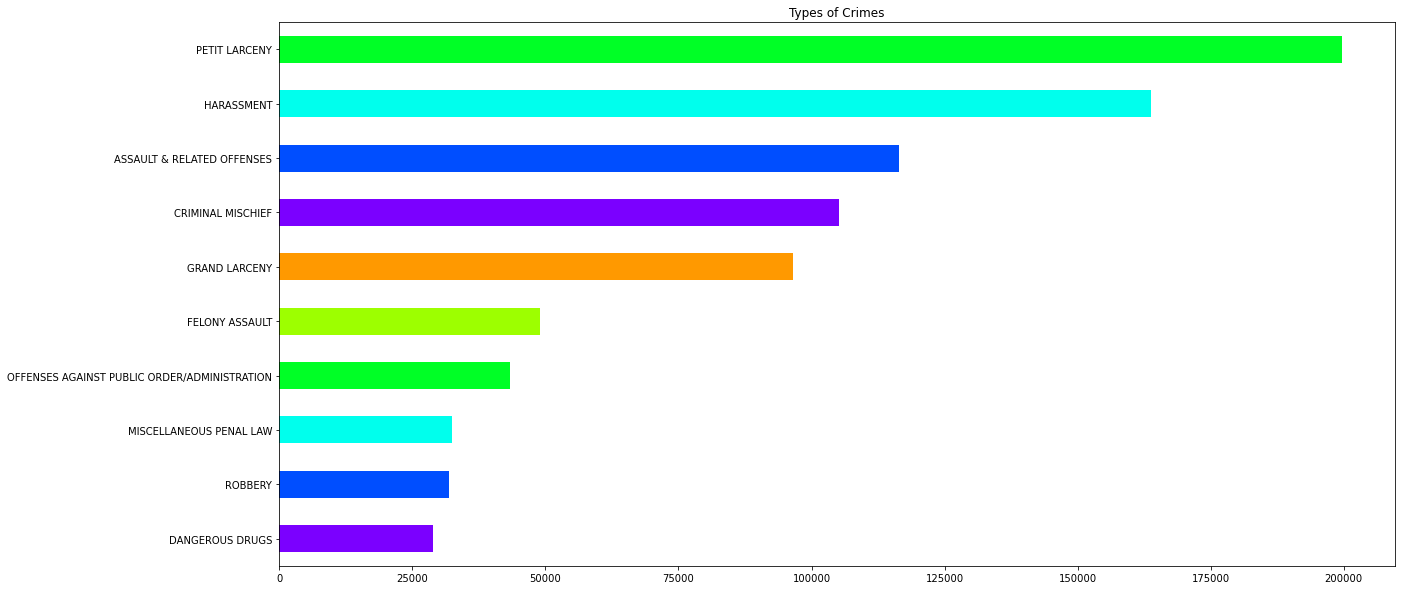

In [27]:
df.OFNS_DESC.value_counts().iloc[:10].sort_values().plot(kind="barh", title = "Types of Crimes", figsize=(20,10), color = sns.color_palette("gist_rainbow_r"))

## Levels of crime
Felonies are the most serious kinds of crimes. Generally, a crime is considered a felony when it is punishable by more than a year in a state prison (also called a penitentiary). Examples of felonies are murder, rape, burglary, and the sale of illegal drugs.

Misdemeanors are less serious crimes, and are typically punishable by up to a year in county jail. Common misdemeanors include shoplifting, drunk driving, assault, and possession of an unregistered firearm. Often, an offense that is a misdemeanor the first time a person commits it becomes a felony the second time around.

Violation are still less serious violations, like those involving traffic laws, which typically subject a person to nothing more than a monetary fine. Defendants charged with infractions usually have no right to a jury trial or a court-appointed lawyer. But repeat offenders, even when the offense is a mere infraction, may face stiffer penalties or charges. (Some states consider certain kinds of infractions like traffic tickets to be civil, rather than criminal, offenses.)

<AxesSubplot:title={'center':'Levels of law'}, ylabel='LAW_CAT_CD'>

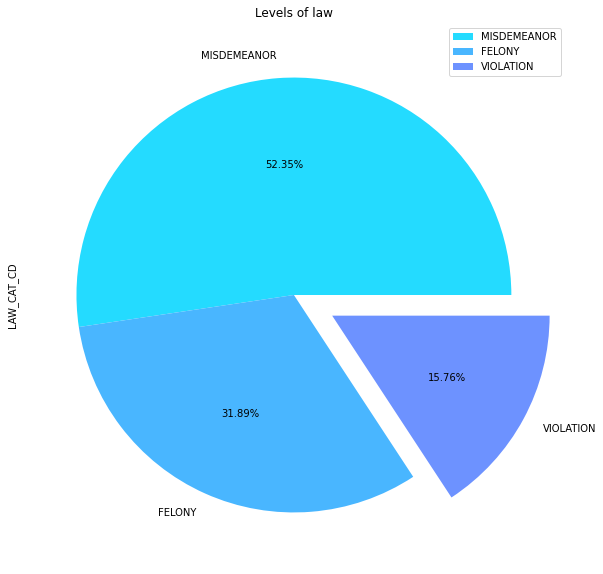

In [28]:
df.LAW_CAT_CD.value_counts().plot(kind='pie', figsize=(15,10), colors=sns.color_palette("cool"), legend=True, autopct='%1.2f%%', explode=(0, 0, 0.20), shadow=False, startangle=0, title="Levels of law")

## Racial analysis

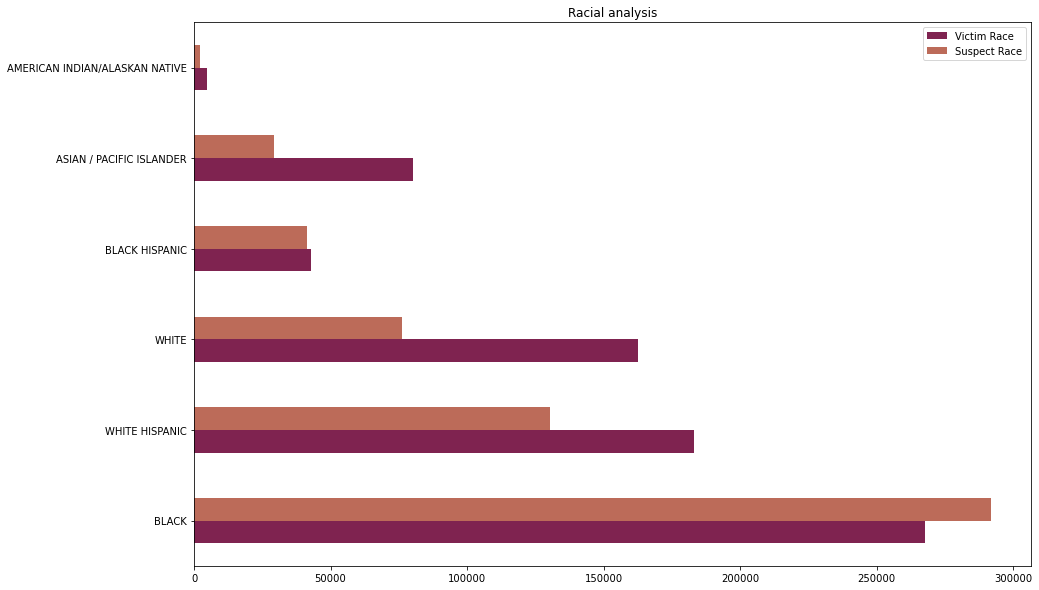

In [29]:
data_vic_susp_race = df[['VIC_RACE', 'SUSP_RACE']].apply(pd.Series.value_counts).reindex(index = ["BLACK", "WHITE HISPANIC", "WHITE", "BLACK HISPANIC", "ASIAN / PACIFIC ISLANDER", "AMERICAN INDIAN/ALASKAN NATIVE"])
ax = data_vic_susp_race.plot(kind="barh", color =sns.color_palette("twilight_shifted_r"), title = 'Racial analysis', figsize=(15,10))
ax.legend(["Victim Race", "Suspect Race"])

#### Based on the data we see we notice BLACK people have highest crime rate in terms of victims and suspects

## Age analysis

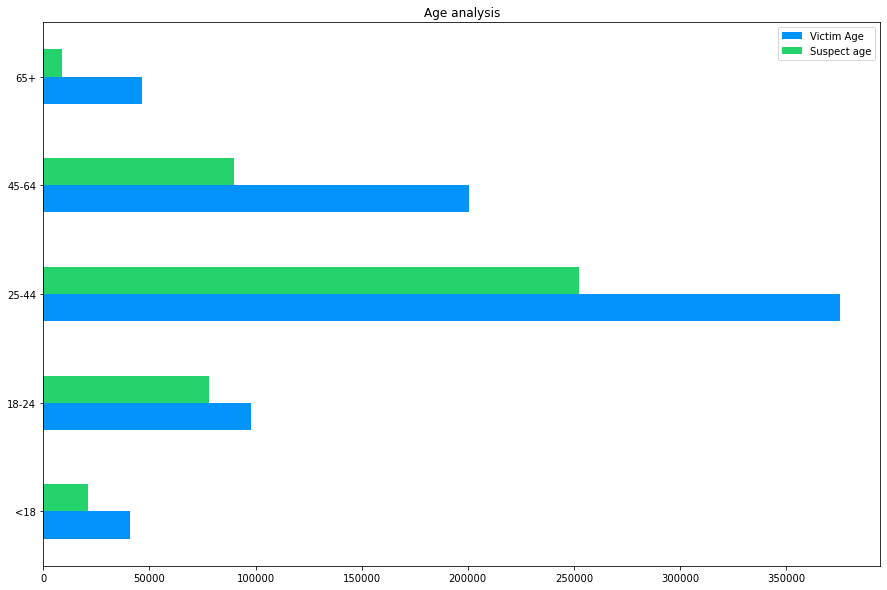

In [30]:
data_vic_susp_age = df[['VIC_AGE_GROUP', 'SUSP_AGE_GROUP']].apply(pd.Series.value_counts).reindex(index = ["<18", "18-24", "25-44", "45-64", "65+"])
ax = data_vic_susp_age.plot(kind="barh", color = sns.color_palette("terrain"), title = 'Age analysis', figsize=(15,10))
ax.legend(["Victim Age", "Suspect age"])

#### We see here that most of the crimes and victims are in the age group of 25-44

## Gender Analysis

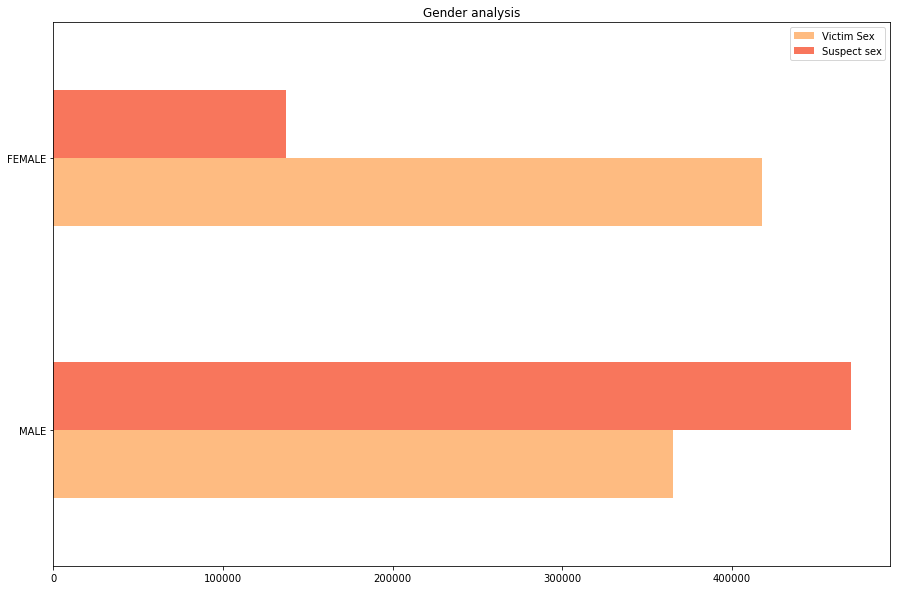

In [31]:
data_vic_susp_sex = df[['VIC_SEX', 'SUSP_SEX']].apply(pd.Series.value_counts).reindex(index = ["MALE", "FEMALE"])
ax = data_vic_susp_sex.plot(kind="barh", color = sns.color_palette("magma_r"), title = 'Gender analysis', figsize=(15,10))
ax.legend(["Victim Sex", "Suspect sex"])

#### With gender analysis in place we notice there are huge amount of female victims, typically female victims face sex crimes hence lets filter by sex crimes to gain more insight.

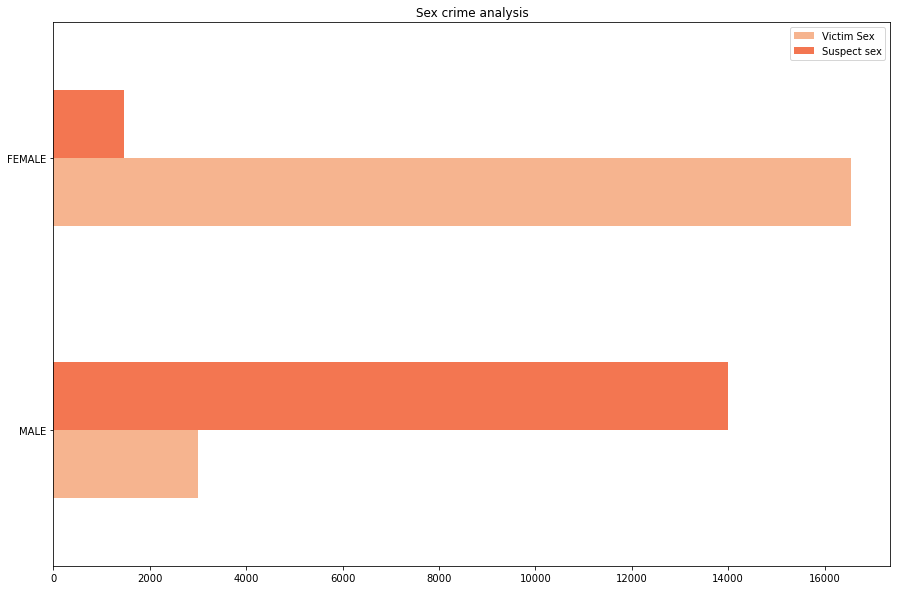

In [32]:
sex_crimes_filtered = df[df.OFNS_DESC.str.contains('SEX CRIMES|RAPE', na=False)]
ax = sex_crimes_filtered[['VIC_SEX', 'SUSP_SEX']].apply(pd.Series.value_counts).reindex(index = ["MALE", "FEMALE"]).plot(kind="barh", color = sns.color_palette("rocket_r"), title = 'Sex crime analysis', figsize=(15,10))
ax.legend(["Victim Sex", "Suspect sex"])

#### This graph confirms our intuition about sexual crimes, female victims face the highest sexual crimes and male suspects are the highest

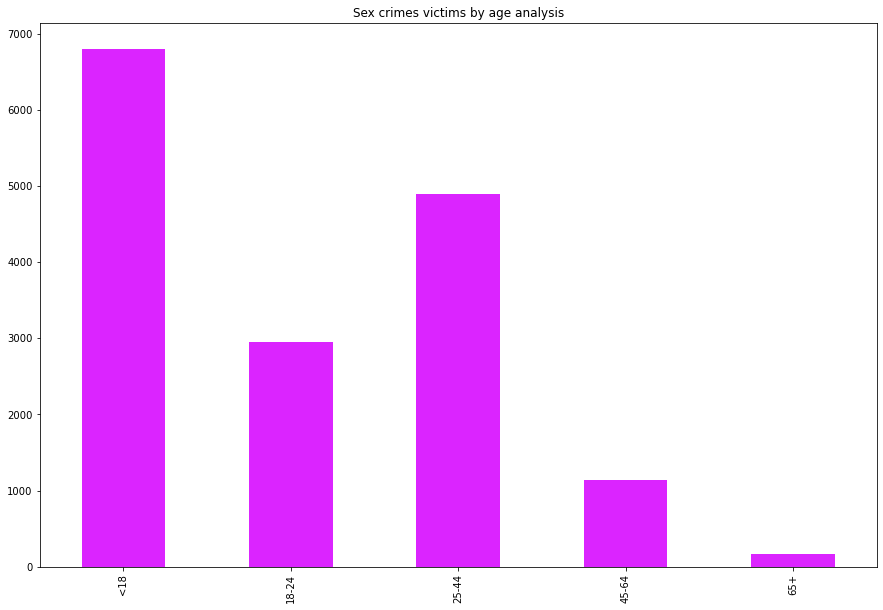

In [33]:
sex_crimes_filtered_female = df[df.OFNS_DESC.str.contains('SEX CRIMES|RAPE', na=False) & df.VIC_SEX.eq('FEMALE')]
sex_crimes_filtered_vic_age = sex_crimes_filtered_female[['VIC_AGE_GROUP']].apply(pd.Series.value_counts).reindex(index = ["<18", "18-24", "25-44", "45-64", "65+"])
ax = sex_crimes_filtered_vic_age.plot(kind="bar",color = sns.color_palette("cool_r"), title = 'Sex crimes victims by age analysis', figsize=(15,10), legend=False)

#### We see here that majority of the female victims are minors, followed by middle age women

<AxesSubplot:title={'center':'Analyze top 10 places of female sex crimes of minors'}>

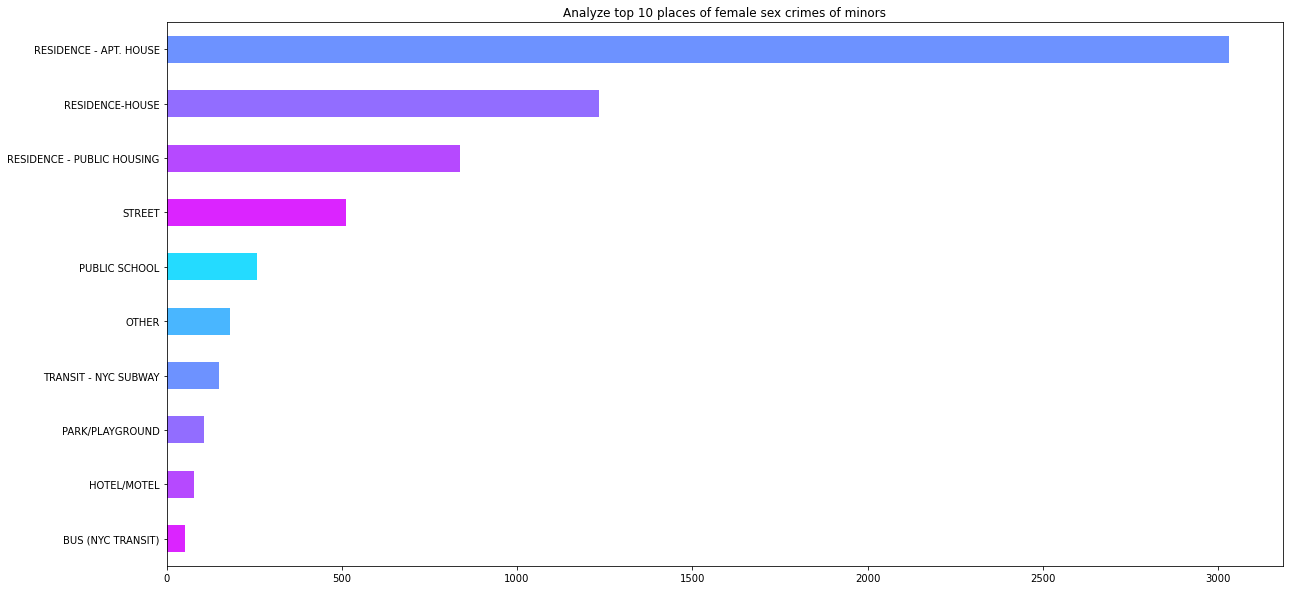

In [34]:
sex_crimes_filtered_female_minors = df[df.OFNS_DESC.str.contains('SEX CRIMES|RAPE', na=False) & df.VIC_SEX.eq('FEMALE') & df.VIC_AGE_GROUP.eq('<18')]
sex_crimes_filtered_female_minors.PREM_TYP_DESC.value_counts().iloc[:10].sort_values().plot(kind="barh", title = "Analyze top 10 places of female sex crimes of minors", figsize=(20,10), color = sns.color_palette("cool_r"))

#### We see that majority of sex crimes happen in or around the place of residence

## Lets sort the data to see data for minors

<AxesSubplot:title={'center':'Analyze top 10 places of female sex crimes of minors'}>

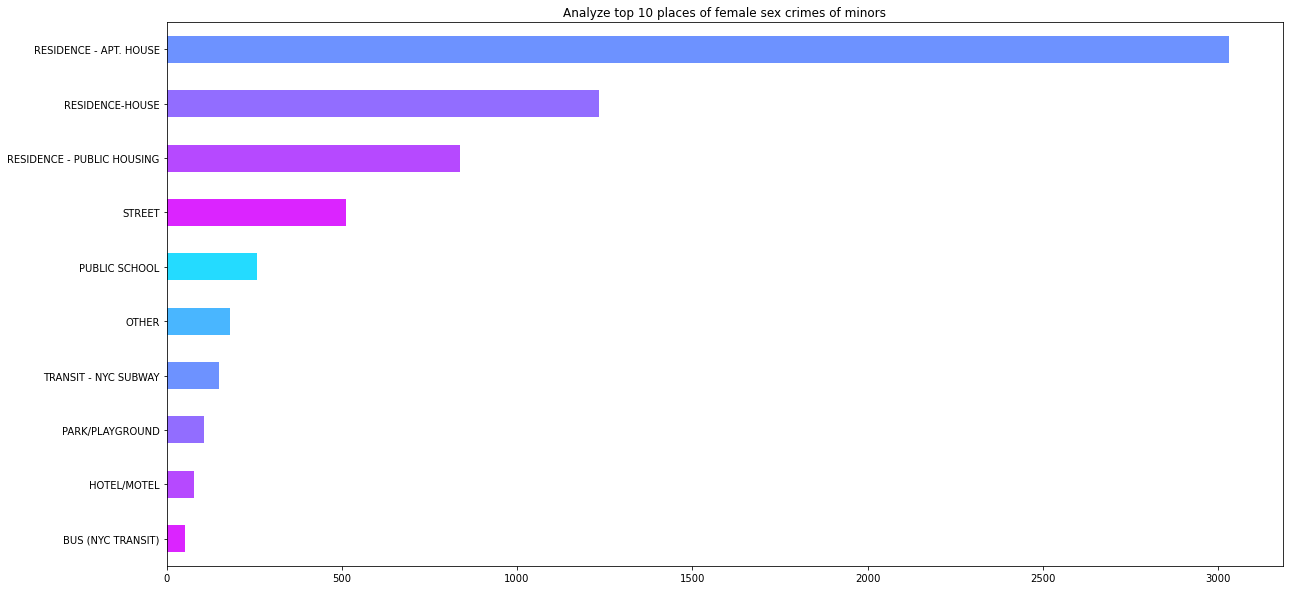

In [38]:
sex_crimes_filtered_female_minors = df[df.OFNS_DESC.str.contains('SEX CRIMES|RAPE', na=False) & df.VIC_SEX.eq('FEMALE') & df.VIC_AGE_GROUP.eq('<18')]
sex_crimes_filtered_female_minors.PREM_TYP_DESC.value_counts().iloc[:10].sort_values().plot(kind="barh", title = "Analyze top 10 places of female sex crimes of minors", figsize=(20,10), color = sns.color_palette("cool_r"))

#### This follows a similar pattern to that of female group in large

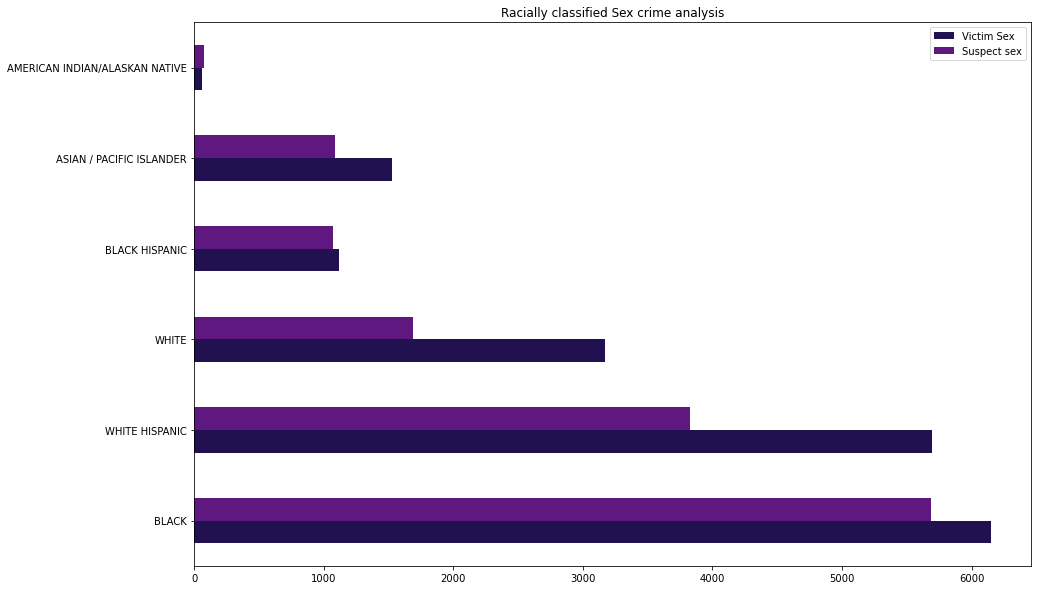

In [35]:
ax = sex_crimes_filtered[['VIC_RACE', 'SUSP_RACE']].apply(pd.Series.value_counts).reindex(index = ["BLACK", "WHITE HISPANIC", "WHITE", "BLACK HISPANIC", "ASIAN / PACIFIC ISLANDER", "AMERICAN INDIAN/ALASKAN NATIVE"]).plot(kind="barh", color = sns.color_palette("magma"), title = 'Racially classified Sex crime analysis', figsize=(15,10))
ax.legend(["Victim Sex", "Suspect sex"])

#### We notice here that black women face the most sex crimes and most perperators are black

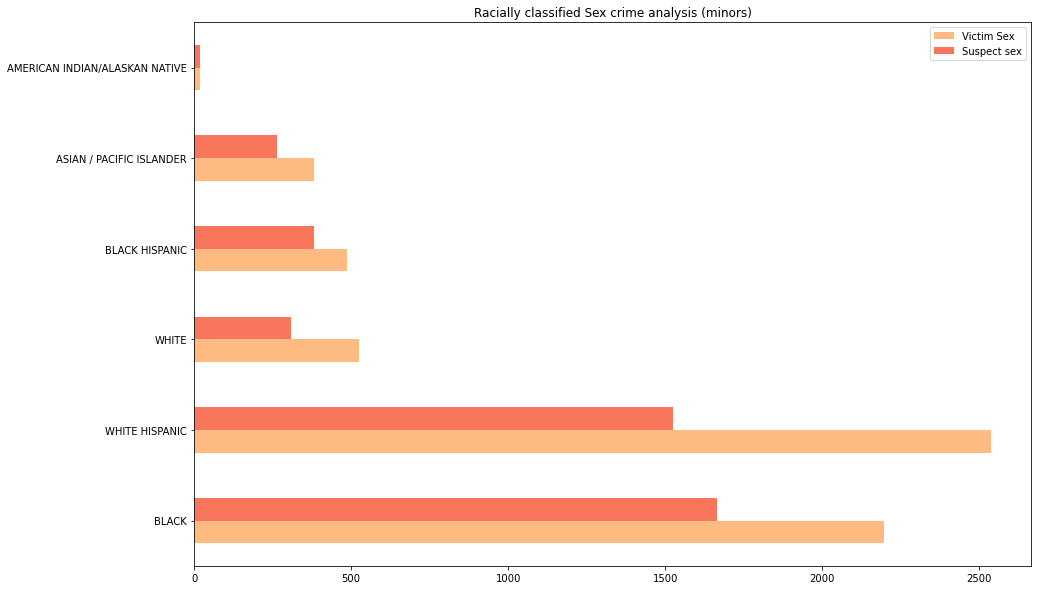

In [39]:
ax = sex_crimes_filtered_female_minors[['VIC_RACE', 'SUSP_RACE']].apply(pd.Series.value_counts).reindex(index = ["BLACK", "WHITE HISPANIC", "WHITE", "BLACK HISPANIC", "ASIAN / PACIFIC ISLANDER", "AMERICAN INDIAN/ALASKAN NATIVE"]).plot(kind="barh", color = sns.color_palette("magma_r"), title = 'Racially classified Sex crime analysis (minors)', figsize=(15,10))
ax.legend(["Victim Sex", "Suspect sex"])

#### We notice here that white minors are more prone to sexual crimes, closely followed by black minors face the most sex crimes. Perperators seem to be both white and black.

<AxesSubplot:title={'center':'Types of Crimes'}>

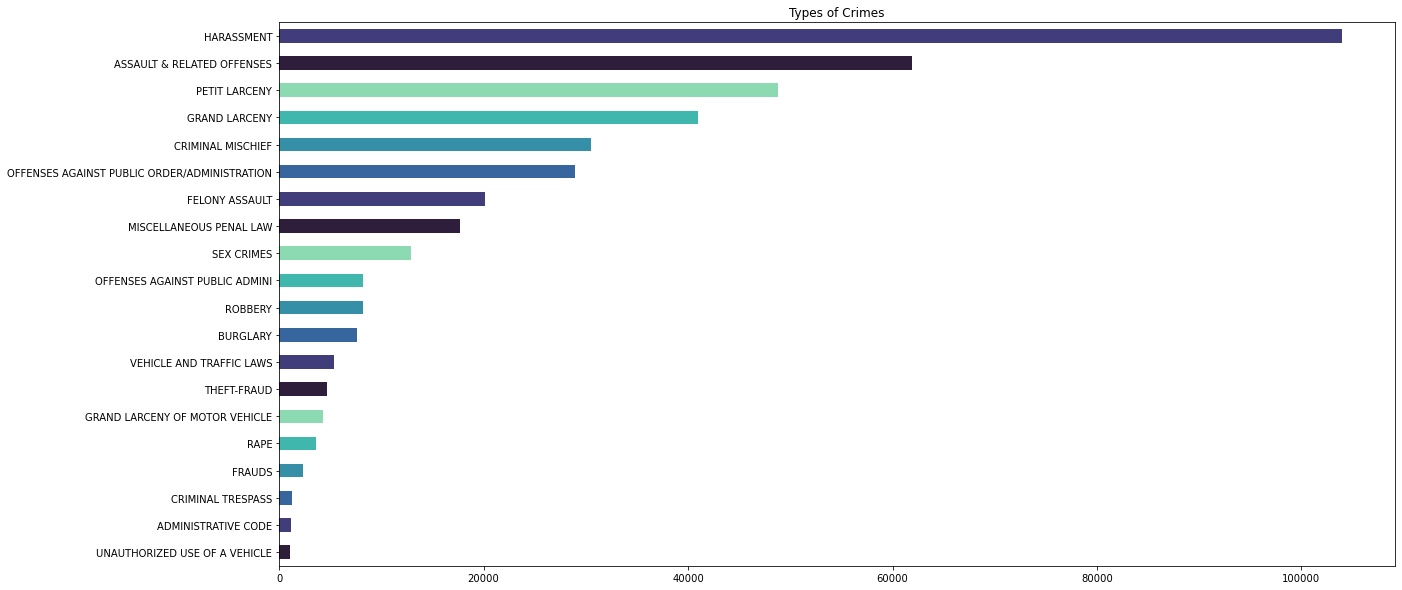

In [36]:
df[df.VIC_SEX.eq('FEMALE')].OFNS_DESC.value_counts().iloc[:20].sort_values().plot(kind="barh", title = "Types of Crimes", figsize=(20,10), color = sns.color_palette("mako"))

#### We see that sex crimes are really low compared to other forms of crime.

In [40]:
from sklearn.metrics import mean_absolute_error

In [47]:
df['CMPLNT_FR_DT']=pd.to_datetime(df['CMPLNT_FR_DT'], errors = 'coerce')
df['YEAR'] = pd.to_datetime(df['CMPLNT_FR_DT']).dt.year
df['MONTH'] = pd.to_datetime(df['CMPLNT_FR_DT']).dt.month

In [49]:
df['YEAR'] = pd.to_numeric(df['YEAR'], errors='coerce').fillna(0).astype('int64')
df['MONTH'] = pd.to_numeric(df['MONTH'], errors='coerce').fillna(0).astype('int64')

In [50]:
df.columns

Index(['_id', 'CMPLNT_NUM', 'CMPLNT_FR_DT', 'CMPLNT_FR_TM', 'ADDR_PCT_CD',
       'RPT_DT', 'KY_CD', 'OFNS_DESC', 'CRM_ATPT_CPTD_CD', 'LAW_CAT_CD',
       'BORO_NM', 'LOC_OF_OCCUR_DESC', 'PREM_TYP_DESC', 'JURIS_DESC',
       'X_COORD_CD', 'Y_COORD_CD', 'SUSP_AGE_GROUP', 'SUSP_RACE', 'SUSP_SEX',
       'Latitude', 'Longitude', 'VIC_AGE_GROUP', 'VIC_RACE', 'VIC_SEX', 'YEAR',
       'MONTH'],
      dtype='object')

## Crime By Month

<AxesSubplot:title={'center':'Total Crime Events by Month'}, xlabel='MONTH'>

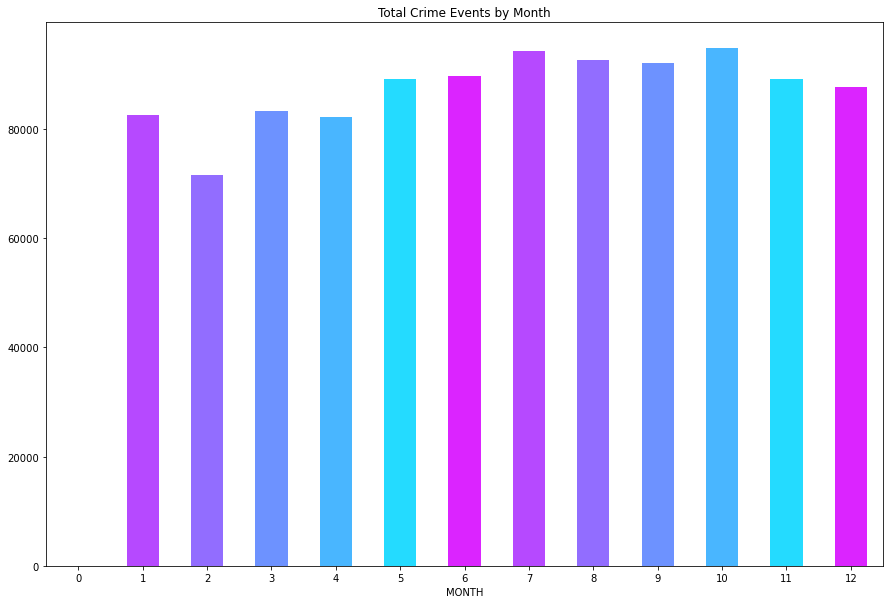

In [51]:
df.groupby('MONTH').size().plot(kind = 'bar', title ='Total Crime Events by Month', figsize=(15,10),  color = sns.color_palette("cool_r") ,rot=0)

## Spatial analysis

<AxesSubplot:title={'center':'Crime by Borough'}>

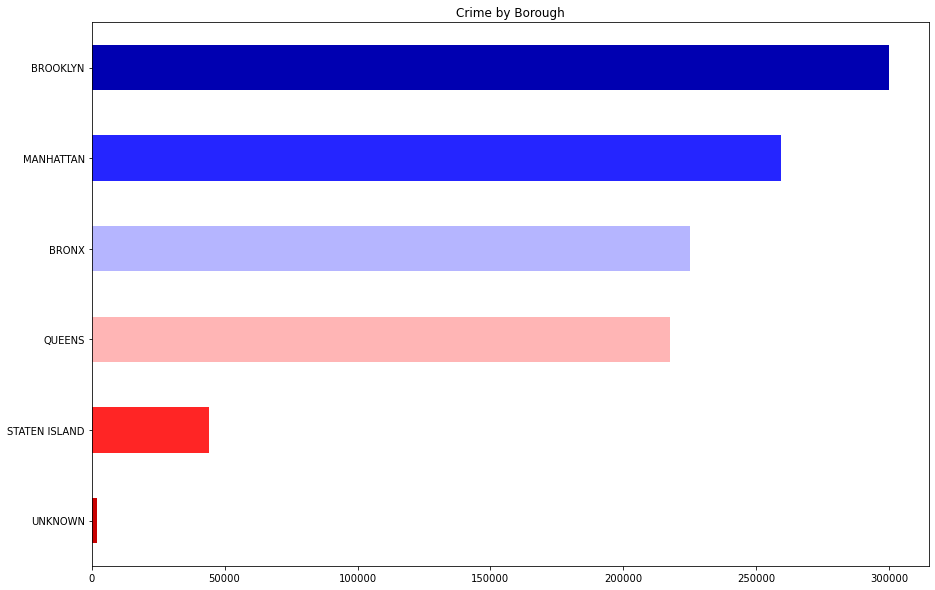

In [59]:
df['BORO_NM'].value_counts().sort_values().plot(kind="barh", color = sns.color_palette("seismic_r"), title = 'Crime by Borough', figsize=(15,10))

## Spatial-Temporal Forecast
So far we made use of the data we have to have analytical glance of data. We see from the above map that each precinct in a city have different crime rates. Predicting crimes on the whole for the city is not useful, since each precicnt may have diffrent response for each level.

### Seasonality
We also learnt from previous data that crimes are seasonal, our dataset serves as a time series to create a temporal dimension, and our GEOGRAPHICAL awareness in the dataset provides us to evaulate each precinct seperately and forecast the data into the future.

But just before that Crimes could be divided into two types oppurtunistic and planned. Planned crimes like Burglary, Grand Theft Auto and Grand Larceny are observed seasonally. The are meticulously planned for a successful outcome and follow a specific trend.

Whereas oppurtunistic crimes happen whenever a perpetuator sees an opportunity to commit crime, like robbery.

### Data split
We will be using the crime data from 2017 to 2019 to predict the crimes of 2020, we have 2020 data in the dataset handy to use it as our test data.

### Focus points
We would be forecasting both burglaries and robberies, since burglary is a planned crime whereas robbery is a oppurunstic crime. This would allow us to build a base model using which we can predict other combinations of crimes.

why are we mixing opportunistic and planned crime in the same analysis? Since crime follows sesonality. We understood that in our temporal analysis. While the success rates of both crimes may differ, they still follow a pattern.

In [60]:
# test data split
df_burglary_train = df[df.ADDR_PCT_CD.eq(75) & df.OFNS_DESC.str.contains("BURGLARY|GRAND|ROBBERY") & df.YEAR.lt(2020) & df.YEAR.gt(2016)].groupby(pd.Grouper(key='CMPLNT_FR_DT', freq='D')).agg(count=('CMPLNT_FR_DT', 'count')).reset_index().rename(columns={"CMPLNT_FR_DT": "ds", "count": "y"}).groupby(pd.Grouper(key='ds', freq='MS')).agg('count').reset_index().rename(columns={"ds": "ds", "y": "y"})

## Forecasting
We will be using Facebook's Prophet library for our forecast.

Prophet is a procedure for forecasting time series data based on an additive model where non-linear trends are fit with yearly, weekly, and daily seasonality, plus holiday effects. It works best with time series that have strong seasonal effects and several seasons of historical data. Prophet is robust to missing data and shifts in the trend, and typically handles outliers well.

Prophet is used in many applications across Facebook for producing reliable forecasts for planning and goal setting.

Our use case perfectly fits to the tool in hand, PERFECT!

In [61]:
from prophet import Prophet

In [62]:
m = Prophet(changepoint_range = 0.5, yearly_seasonality=True, changepoint_prior_scale=0.16).fit(df_burglary_train)

future = m.make_future_dataframe(periods=12, freq='MS')
fcst = m.predict(future)

12:51:37 - cmdstanpy - INFO - Chain [1] start processing
12:51:55 - cmdstanpy - INFO - Chain [1] done processing


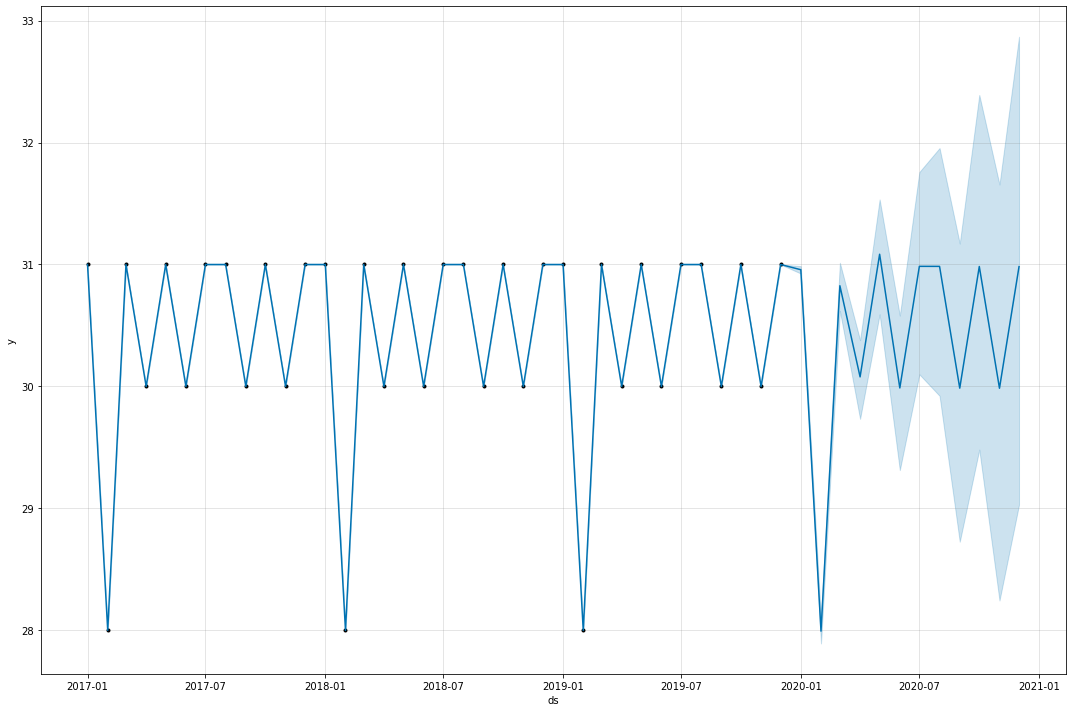

In [63]:
fig = m.plot(fcst, figsize=(15,10))

## TESTING
While we got our predictions, we still need to test our data for accuracy, hence we utilise our test data to score our predictions.

In [64]:
from sklearn.metrics import mean_absolute_error

In [65]:
g1 = df[df.ADDR_PCT_CD.eq(75) & df.OFNS_DESC.str.contains("BURGLARY|GRAND|ROBBERY") & df.YEAR.gt(2019)].groupby(pd.Grouper(key='CMPLNT_FR_DT', freq='D')).agg(count=('CMPLNT_FR_DT', 'count')).reset_index().rename(columns={"CMPLNT_FR_DT": "ds", "count": "y"})
df_burglary_test = g1.groupby(pd.Grouper(key='ds', freq='MS')).agg('count').reset_index().rename(columns={"ds": "ds", "y": "y"})

MAE: 0.146


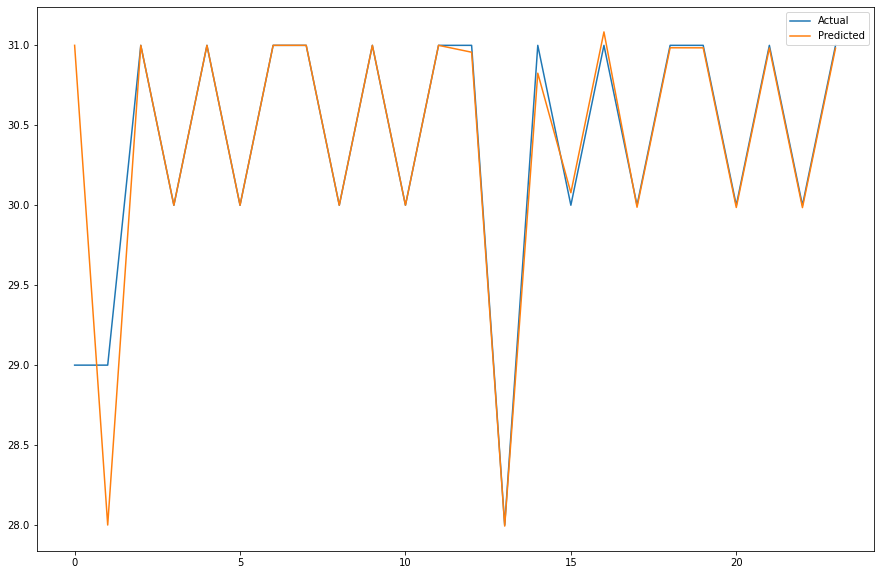

In [66]:
y_true = df_burglary_test['y'].values
y_pred = fcst['yhat'][-24:].values
mae = mean_absolute_error(y_true, y_pred)
print('MAE: %.3f' % mae)

plt.figure(figsize=(15,10))
plt.plot(y_true, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.set_cmap(sns.color_palette("twilight_shifted", as_cmap=True))
plt.show()

## Closing notes
Crime has an interesting, pattern when looked at a spatial temporal approach. Is it a marker to rely on? Patterns seems to be consistent over the years. Which help us make a forecast with an accuracy.

But Crimes trends are influenced with various external factors, though the patterns remain similar. Trends help us be prepared while patterns help us to understand them.

### Quick fact
Few decades ago cars used leaded fuel, at the peak of its usage the lead caused so many issues in brain development. Crimes rates increased by the mid 80's. Then once govts started phasing out leaded fuel, crime trends dropped. This research was conducted by several envrionmental study groups.

Our analyisis dived into crime patterns in NYC, and we have observed various insights and forecasted the crime patterns.

### Improvements
Our forecast focusses on spatial-temporal dimensions and seasonalities. It needs to factor in more markers like local education, police funding etc.